In [2]:
from gensim.models import word2vec
import random
import numpy as np

In [3]:
cbow_model = word2vec.Word2Vec.load_word2vec_format('/Users/mars/GitHub/word2vec/vectors.bin', binary=True)

In [23]:
print len(cbow_model['crap'])

200


In [4]:
print cbow_model.most_similar('crap')

[(u'yeah', 0.48600560426712036), (u'gonna', 0.4803088307380676), (u'me', 0.47260957956314087), (u'my', 0.4593295454978943), (u'you', 0.4352934956550598), (u'i', 0.43390926718711853), (u'mornin', 0.4268338084220886), (u'goodbye', 0.4229400157928467), (u'livin', 0.4224318861961365), (u'ya', 0.42216718196868896)]


In [10]:
print cbow_model.most_similar("awful")

[(u'grin', 0.48253822326660156), (u'laughing', 0.48046422004699707), (u'damn', 0.47308647632598877), (u'funny', 0.4610547125339508), (u'fool', 0.4548845589160919), (u'stupid', 0.45455998182296753), (u'crazy', 0.4527096748352051), (u'bun', 0.44964417815208435), (u'nobody', 0.4494776129722595), (u'saying', 0.44438010454177856)]


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

(-0.48406759500503538, 0.58760330677032468)

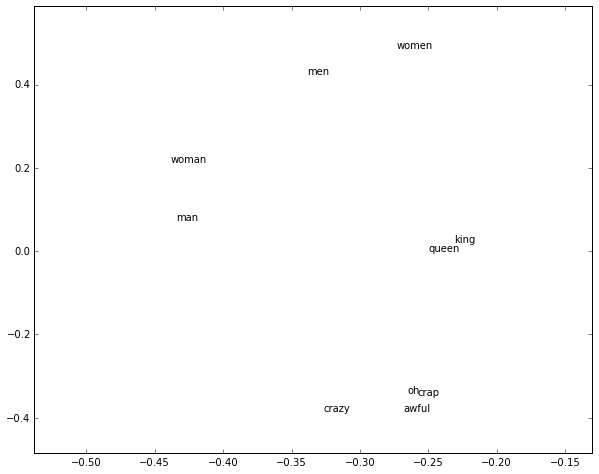

In [28]:
visualizeWords = ['man','men','king','queen','women','woman','crap','oh','awful','crazy']
visualizeList = []
for word in visualizeWords:
    row = cbow_model[word]
    visualizeList.append(row)

visualizeVecs = np.vstack(visualizeList)

U, s, Vh = np.linalg.svd(visualizeVecs, full_matrices=False)
for i in xrange(len(visualizeWords)):
    plt.text(U[i,0], U[i,1], visualizeWords[i])

plt.xlim((np.min(U[:,0]) - 0.1, np.max(U[:,0]) + 0.1))
plt.ylim((np.min(U[:,1]) - 0.1, np.max(U[:,1]) + 0.1))

200


(-0.84900674819946287, 0.35482320785522459)

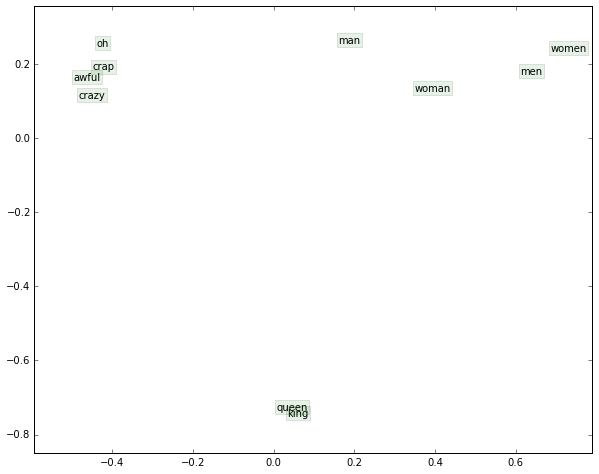

In [27]:
visualizeWords = ['man','men','king','queen','women','woman','crap','oh','awful','crazy']
visualizeList = []
for word in visualizeWords:
    row = cbow_model[word]
    visualizeList.append(row)

visualizeVecs = np.vstack(visualizeList)

temp = (visualizeVecs - np.mean(visualizeVecs, axis=0))
covariance = 1.0 / len(visualizeWords) * temp.T.dot(temp)

U, S, V = np.linalg.svd(covariance)

print len(U[:, 0:2])
coord = temp.dot(U[:, 0:2]) 

for i in xrange(len(visualizeWords)):
    plt.text(coord[i,0], coord[i,1], visualizeWords[i], bbox=dict(facecolor='green', alpha=0.1))
    
plt.xlim((np.min(coord[:,0]) - 0.1, np.max(coord[:,0]) + 0.1))
plt.ylim((np.min(coord[:,1]) - 0.1, np.max(coord[:,1]) + 0.1))

In [20]:
words = ['I','like','enjoy','deep','learning','NLP','flying']
X = np.array([[0,2,1,0,0,0,0,0],
              [2,0,0,1,0,1,0,0],
              [1,0,0,0,0,0,1,0],
              [0,1,0,0,1,0,0,0],
              [0,0,0,1,0,0,0,1],
              [0,1,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1],
              [0,0,0,0,1,1,1,0]])

U, s, Vh = np.linalg.svd(X, full_matrices=False)
print U
print U[:,0]
print U[:,1]

[[ -5.24124930e-01  -5.72859145e-01   9.54463014e-02   3.83228493e-01
   -1.76963375e-01  -1.76092183e-01  -4.19185600e-01  -5.57702732e-02]
 [ -5.94438071e-01   6.30120664e-01  -1.70207779e-01   3.10038363e-01
    1.84062339e-01  -2.34777849e-01   1.29535474e-01   1.36813128e-01]
 [ -2.56274005e-01   2.74017533e-01   1.59810848e-01  -2.77555756e-16
   -5.78984617e-01   6.36550929e-01  -1.16573418e-15  -3.05414877e-01]
 [ -2.85637408e-01  -2.47912130e-01   3.54610324e-01  -7.31901294e-02
    4.45784489e-01   8.36141432e-02   5.48721075e-01  -4.68012411e-01]
 [ -1.93139313e-01   3.38495048e-02  -5.00790405e-01  -4.28462480e-01
    3.47110226e-01   1.55483227e-01  -4.68663749e-01  -4.03576557e-01]
 [ -3.05134684e-01  -2.93988990e-01  -2.23433593e-01  -1.91614246e-01
    1.27460940e-01   4.91219408e-01   2.09592800e-01   6.57535375e-01]
 [ -1.82489837e-01  -1.61027767e-01  -3.97842428e-01  -3.83228493e-01
   -5.12923221e-01  -4.27574417e-01   4.19185600e-01  -1.18313828e-01]
 [ -2.4689842

(-0.67285914453699858, 0.73012066356268746)

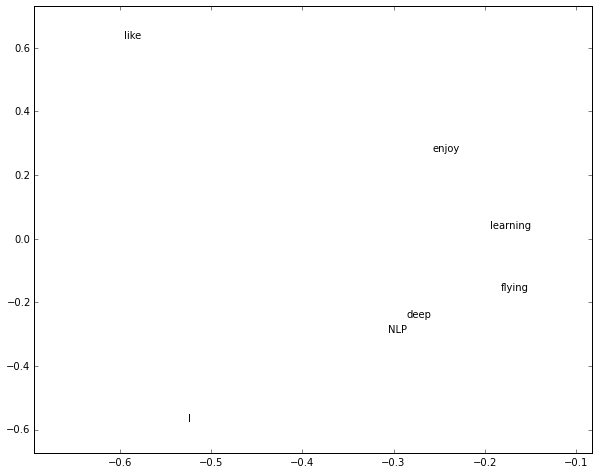

In [18]:
for i in xrange(len(words)):
    plt.text(U[i,0], U[i,1], words[i])

plt.xlim((np.min(U[:,0]) - 0.1, np.max(U[:,0]) + 0.1))
plt.ylim((np.min(U[:,1]) - 0.1, np.max(U[:,1]) + 0.1))